#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# IS-LM MODEL
---

This note illustrates how to code the IS-LM Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the IS-LM Model or to show best coding practices. The note also assumes familiarity with the IS-LM model and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

## TABLE OF CONTENTS
1. [The IS-LM model](#1.-THE-IS-LM-MODEL)
2. [The IS schedule (Investment-Saving)](#2.-THE-IS-SCHEDULE-(INVESTMENT-SAVING))
3. [The LM schedule (Liquidity Preference-Money Supply)](#3.-THE-LM-SCHEDULE-(LIQUIDITY-PREFERENCE-MONEY-SUPPLY))
4. [Equilibrium](#4.-EQUILIBRIUM)
5. [Dynamics](#5.-DYNAMICS)

# 1. THE IS-LM MODEL

The IS-LM, or Hicks-Hansen, model shows the combinations of interest rate (vertical axis) and income (horizontal axis) for which the goods market (IS) and the loan market (LM) are in equilibrium. There is one particular combination of interest rate and income that is consistent with equilibrium in both markets simultaneosuly. 

In the graphic version of the model, all the points in the **IS shedule** represent equilibrium in the goods makret. Similarly, all the points in the **LM schedule** represents equlibrium in the loan market.

This model treats the price level as exogenous (given and fixed). In this sense, the IS-LM model is applicable in the context of idle resources or when changes in income has no effect on the price level.

# 2. THE IS SCHEDULE (INVESTMENT-SAVING)

The IS schedule is derived from the equilbrium condition where output $(Y)$ equals spending:

\begin{equation}
Y = C + I + G + (X - Z)
\end{equation}

where $C$ is household consumption, $I$ is private investment, $G$ is the level of government spending, $X$ is exports, and $Z$ is imports. We can treat variables $G = \bar{G}$ and $X = \bar{X}$ as exogenous. The former is defined by policy makers, the latter is given by economic conditions in the rest of the world. A more detailed exposition, such as the Mundell-Fleming model, would also take into consideration the exchange rate, and exprots will also be dependent (to some extent) of domestic economic policy.

Household's consumption follow a keynesian consumption function:

\begin{equation}
 C = a + b(Y - T)
\end{equation}

where $a \geq 0$ is the level of autonomous consumption (indepenent of the level of income), $b \in (0, 1)$ is the marginal propensity to consume, and $T$ is the dollar-amount of taxes.

Assume now a simple linear relationship between investment and the interst rate $i$:

\begin{equation}
    I = \bar{I} - d \cdot i
\end{equation}

where $\bar{I}$ represents the level of investment when $i = 0$ and $d$ is the rate at which $I$ falls when $i$ increases.

We can also assume that imports follow a similar functional form than household's domestic consumption:

\begin{equation}
    Z = \alpha + \beta (Y - T)
\end{equation}

where $\alpha$ is the autonomous level of imports and $\beta$ is the marginal propensity to import.

To derive the IS schedule we need to use the consumption, investment, and import functions and solve for $i$ from the equilibrium condition:

\begin{align}
    Y &= C + I + G + (X - Z)                                                                                                       \\
    Y &= \underbrace{\left[a + b(Y-T) \right]}_{C} + \underbrace{\left[\bar{I} - d \cdot i \right]}_{I} + \bar{G} + \left[X - \underbrace{\left(\alpha + \beta(Y-T) \right)}_{Z} \right]                                                                         \\
    i_{IS} &= \underbrace{\frac{(a-\alpha)-(b-\beta)T + \bar{I} + \bar{G} + \bar{X}}{d}}_\text{intercept} - \underbrace{\frac{1-b+\beta}{d} }_\text{slope} \cdot Y
\end{align}

Note that the larger $\alpha$ and $\beta$, the lower the intercept. This means that at the same level of $i$ income will be lower. Note also that the intercept and the slope of the IS schedule is sensitive to the value of $d$. The more (less) sensitive investment is to $d$, the more (less) horizontal the IS schedule looks. Finally, note that the IS schedule is a straight line.

The following code plots the IS scheduel using the above information. The first part of the code imports the required Python packages. The second part of the code defines the parameters and arrays. The third part of the code defines and populates the IS schedule. The fourt part of the code plots the IS schedule.

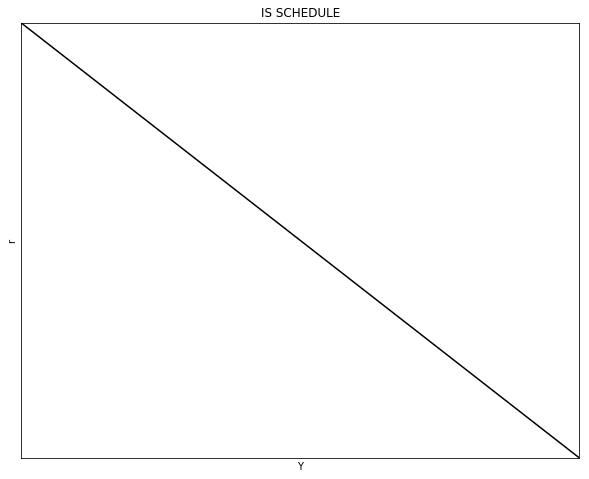

In [8]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
Y_size = 100
a = 20                 # Autonomous consumption
b = 0.2                # Marginal propensity to consume
alpha = 5              # Autonomous imports
beta  = 0.2            # Marginal propensity to import
T = 1                  # Taxes
I_bar = 10             # Investment intercept (when i = 0)
G_bar = 8              # Government spending
X_bar = 2              # Exports (given)
d = 5                  # Investment slope wrt to i
# Arrays
Y = np.arange(Y_size)  # Array values of Y
i = np.zeros(Y_size)   # Empty array of i

"3|DEFINE AND POPULATE THE IS-SCHEDULE"
def i_IS(a, alpha, b, beta, T, I_bar, G_bar, X_bar, d, Y):
    i_IS = ((a-alpha)-(b-beta)*T + I_bar + G_bar + X_bar - (1-b+beta)*Y)/d
    return i_IS

def Y_IS(a, alpha, b, beta, T, I_bar, G_bar, X_bar, d, i):
    Y_IS = ((a-alpha)-(b-beta)*T + I_bar + G_bar + X_bar - d*i)/(1-b+beta)
    return Y_IS

for j in range(0, Y_size):
    i[j] = i_IS(a, alpha, b, beta, T, I_bar, G_bar, X_bar, d, j)
    
"4|PLOT THE IS-SCHEDULE"
y_max = np.max(i)
x_max = Y_IS(a, alpha, b, beta, T, I_bar, G_bar, X_bar, d, 0)

v = [0, x_max, 0, y_max]                        # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="IS SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i, "k-")
ax.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
plt.axis(v)                                     # Use 'v' as the axes range
plt.show()

# 3. THE LM SCHEDULE (LIQUIDITY PREFERENCE-MONEY SUPPLY)

To build the LM schedule we need money supply $(M^S)$ and money demand $(M^D)$. Money supply is an exogenous variable (e.g. a policy decision of the central bank). Following Keynes, the three sources of money demand are (1) precautionary reasons (e.g. save for  a rainy-day), (2) to perform transaction and (3) for speculation reasons. Expressing $M^S$ and $M^D$ in real terms:

\begin{align}
    \frac{M^S}{P} &= \frac{M^S_0}{P}      \\
    \frac{M^D}{P} &= c_1 + c_2 Y - c_3 i
\end{align}

Where $c_1$, $c_2$, and $c_3$ represent the precautionary, transaction, and speculation reasons to demand money. Note that the amount of money needed for transactions depends on the level of income. The interest rate has a negative relationship with money demand due to Keynes' expectations theory (not covered in this note).

Since in equilibrium $M^S = M^D$, the LM schedule can be expressed in the following way:

\begin{align}
    \frac{M^S_0}{P} &= M^D                                                               \\
    \frac{M^S_0}{P} &= c_1 + c_2 Y - c_3 i                                               \\
    i_{LM} &= \underbrace{\frac{1}{c_3} \cdot \left(c_1 - \frac{M^S_0}{P} \right)}_\text{intercept} - \underbrace{\frac{c_2}{c_3}}_\text{slope} \cdot Y
\end{align}

Note that if the interest rate has no effect on money demand $(c_3 \to 0)$, then the LM schedule becomes inelastic (vertical).

We can plot the LM schedule in a similar way we did for the IS schedule.

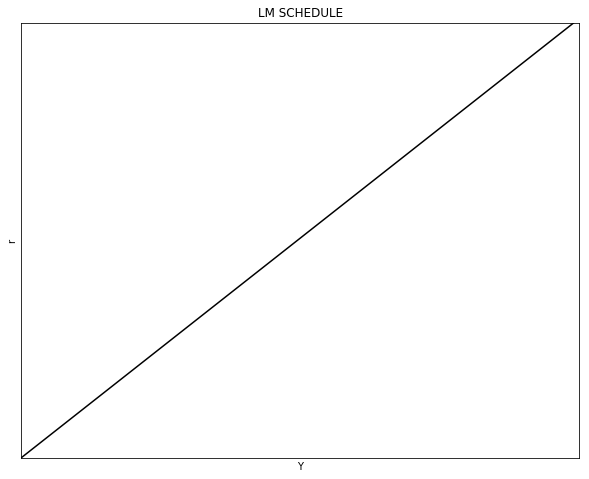

In [9]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
Y_size = 100
c1 = 1000              # Precautionary money demand
c2 = 10                # Transaction money demand
c3 = 10                # Speculation money demand
Ms = 20000             # Nominal money supply
P  = 20                # Price level
# Arrays
Y = np.arange(Y_size)  # Array values of Y
i = np.zeros(Y_size)   # Empty array of i

"3|DEFINE AND POPULATE THE LM-SCHEDULE"
def i_LM(c1, c2, c3, Ms, P, Y):
    i_LM = (c1 - Ms/P)/c3 + c2/c3*Y
    return i_LM

for j in range(0, Y_size):
    i[j] = i_LM(c1, c2, c3, Ms, P, j)
    
"4|PLOT THE IS-SCHEDULE"
y_max = np.max(i)

v = [0, Y_size, 0, y_max]                       # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i, "k-")
ax.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
plt.axis(v)                                     # Use 'v' as the axes range
plt.show()

# 4. EQUILIBRIUM

Note that there is no variable that is on both schedules. This means that any shock shifts only one of the schedules. This construction conveniently separates monetary policy as shifts of the LM schedule from fiscal policy as shifts of the IS schedule. As mentioned above, note that this model has an exogenous (treated as constant) price level.

There is a pair $(Y^*, i^*)$ that produces the "general" equilibrium (contingent to parameters defining positive values for $Y^*$ and $i^*$). If IS = LM, then:

\begin{align}
    i_LM &= i_IS \\
    \frac{1}{c_3} \left(c_1 - \frac{MS_0}{P} \right) - \frac{c_2}{c_3} \cdot Y &= \frac{(a-\alpha)-(b-\beta)T + \bar{I} + \bar{G} + X}{d} - \frac{1-b+\beta}{d} \cdot Y \\
    Y^* &= \frac{\left[(a-\alpha)-(b-\beta)T+\bar{I}+\bar{G}+X\right]/d + (1/c_3) \left(c_1 - M^S_0/P \right)}{(1-b+\beta)/d - (c_2/c_3)}
\end{align}

And the interest rate of equilibrium would be:

\begin{align}
    i^* &= \frac{1}{c_3} \left(c_1 - \frac{M^S_0}{P} \right) + \frac{c_2}{c_3} \cdot Y^*  \\
    i^* &= \frac{1}{c_3} \left(c_1 - \frac{M^S_0}{P} \right) + \frac{c_2}{c_3} \cdot \left(\frac{1-b+\beta}{d} - \frac{c_2}{c_3} \right) \cdot \left[\frac{(a-\alpha)-(b-\beta)T + \bar{I} + \bar{G} + X}{d} + \frac{1}{c_3} \left(c_1-\frac{M^S_0}{P} \right) \right]^{-1}
\end{align}

The next plot codes the IS-LM model and locates for arrows showing the dynamics of the model when located out of equilibrium. The IS and LM schedules and dynamics are denoted in blue and red respectively. 

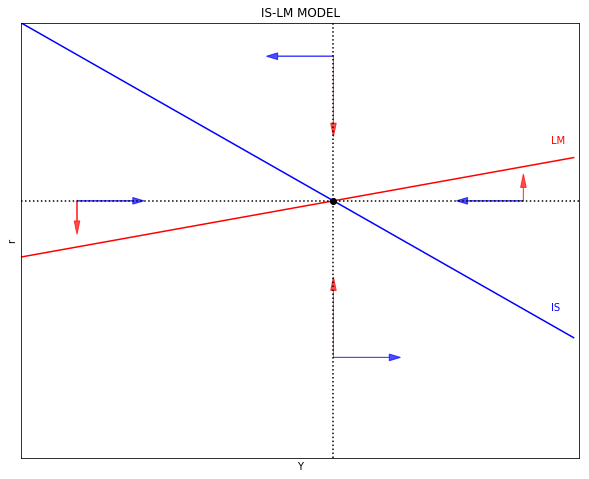

In [4]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Model domain
Y_size = 100
Y    = np.arange(Y_size)    # Array values of Y
iIS  = np.zeros(Y_size)     # Empty array for the IS
iLM  = np.zeros(Y_size)     # Empty array for the LM
# IS Parameters
a = 100                     # Autonomous consumption
b = 0.2                     # Marginal propensity to consume
alpha = 5                   # Autonomous imports
beta  = 0.15                # Marginal propensity to import
T = 1                       # Taxes
I = 10                      # Investment intercept (when i = 0)
G = 20                      # Government spending
X = 5                       # Exports (given)
d = 2                       # Investment slope wrt to i
# LM Parameters
c1 = 2500                   # Precautionary money demand
c2 = 0.75                   # Transaction money demand
c3 = 5                      # Speculation money demand
Ms = 23500                  # Nominal money supply
P  = 10                     # Price level

"3|DEFINE AND POPULATE THE IS AND LM SCHEDULES"
def i_IS(a, alpha, b, beta, T, I, G, X, d, Y):
    i_IS = ((a-alpha)-(b-beta)*T + I + G + X - (1-b+beta)*Y)/d
    return i_IS

def i_LM(c1, c2, c3, Ms, P, Y):
    i_LM = (c1 - Ms/P)/c3 + c2/c3*Y
    return i_LM

for j in range(0, Y_size):
    iIS[j] = i_IS(a, alpha, b, beta, T, I, G, X, d, j)
    iLM[j] = i_LM(c1, c2, c3, Ms, P, j)

"4|CALCULATE EQUILIBRUM VALUES"
Y_star1 = ((a-alpha) - (b-beta)*T + I + G + X)/d
Y_star2 = (1/c3) * (c1 - Ms/P)
Y_star3 = (1 - b + beta)/d + (c2/c3)
Y_star  = (Y_star1 - Y_star2)/Y_star3

i_star1 = (1/c3)*(c1 - Ms/P)
i_star2 = (c2/c3)*Y_star
i_star  = i_star1 + i_star2

"5|PLOT THE IS-LM model"
y_max = np.max(iIS)
v = [0, Y_size, 0, y_max]                     # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="IS-LM MODEL", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, iIS, "b-")
ax.plot(Y, iLM, "r-")
ax.yaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())  # Hide ticks
ax.arrow(10, i_star, 10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(10, i_star,  0, -3, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(Y_star, 15, 10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(Y_star, 15,  0, 10, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(90, i_star,-10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(90, i_star,  0,  2, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(Y_star, 60,-10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(Y_star, 60,  0,-10, head_length=2, head_width=1, color='r', alpha=0.7)
plt.plot(Y_star, i_star, 'ko')
plt.axvline(x=Y_star, ls=':', color='k')
plt.axhline(y=i_star, ls=':', color='k')
plt.text(95, 22, "IS", color='b')
plt.text(95, 47, "LM", color='r')
plt.axis(v)                                   # Use 'v' as the axes range
plt.show()

# 5. DYNAMICS

The arrows in the above figure shows that the model is stable when out of equilibrium (it converges back to equilibrium from any point). The code below shows the dynamics towards equilbrium starting from four disequilibrium points: A in blue, B in red, C in green, and D in cyan. Ten iterations starting from each point is enough to show the dynamics towards equilibrium.

Horizontal changes $(Y)$ is calculated with the IS function. Vertical changes $(i)$ is calculated with the LM function (see the arrows in the above figure). Starting from a disequilbrium point, the location of the next point is calculated with these two functions. Adding time period $(t = 0, ..., 10)$, where $Y_{0}$ and $i_{0}$ are arbitrary initial values, then:

\begin{align}
    Y_{t} &= \frac{(a-\alpha) - (b-\beta)T + \bar{I} + \bar{G} + X}{1-b+\beta} - \frac{d}{1-b+\beta} \cdot i_{t-1}   \\
    i_{t} &= \frac{1}{c_3} \left(c_1 - \frac{M^S_0}{P} \right) + \frac{c_2}{c_3} \cdot Y_{t-1}
\end{align}

The code below is similar to the ones above with the addition of the four dynamics for each different starting point.

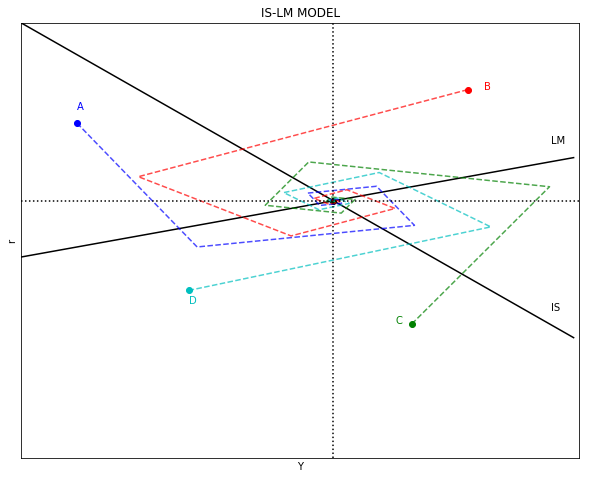

In [10]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Model domain
Y_size = 100
Y   = np.arange(Y_size)     # Array values of Y
iIS = np.zeros(Y_size)      # Empty array for the IS
iLM = np.zeros(Y_size)      # Empty array for the LM
# IS Parameters
a = 100                     # Autonomous consumption
b = 0.2                     # Marginal propensity to consume
alpha = 5                   # Autonomous imports
beta  = 0.15                # Marginal propensity to import
T = 1                       # Taxes
I = 10                      # Investment intercept (when i = 0)
G = 20                      # Government spending
X = 5                       # Exports (given)
d = 2                       # Investment slope wrt to i
# LM Parameters
c1 = 2500                   # Precautionary money demand
c2 = 0.75                   # Transaction money demand
c3 = 5                      # Speculation money demand
Ms = 23500                  # Nominal money supply
P  = 10                     # Price level

"3|DEFINE AND POPULATE THE IS AND LM SCHEDULES"
def i_IS(a, alpha, b, beta, T, I, G, X, d, Y):
    i_IS = ((a-alpha)-(b-beta)*T + I + G + X - (1-b+beta)*Y)/d
    return i_IS

def i_LM(c1, c2, c3, Ms, P, Y):
    i_LM = (c1 - Ms/P)/c3 + c2/c3*Y
    return i_LM

for j in range(0, Y_size):
    iIS[j] = i_IS(a, alpha, b, beta, T, I, G, X, d, j)
    iLM[j] = i_LM(c1, c2, c3, Ms, P, j)

"4|CALCULATE EQUILIBRUM VALUES"
Y_star1 = ((a-alpha) - (b-beta)*T + I + G + X)/d
Y_star2 = (1/c3) * (c1 - Ms/P)
Y_star3 = (1 - b + beta)/d + (c2/c3)
Y_star  = (Y_star1 - Y_star2)/Y_star3

i_star1 = (1/c3)*(c1 - Ms/P)
i_star2 = (c2/c3)*Y_star
i_star  = i_star1 + i_star2

"5|CALCULATE THE DYNAMICS FOR DISEQUILIBRIUM POINTS"
iterations= 10
def Y_IS(a, alpha, b, beta, T, I, G, X, d, i):
    Y_IS = ((a-alpha)-(b-beta)*T+I+G+X)/(1-b+beta) - d/(1-b+beta)*i
    return Y_IS

" |STARTING POINT A"
YA = 10
iA = 50

A_i_LM = np.zeros(iterations)
A_Y_IS = np.zeros(iterations)

A_Y_IS[0] = YA
A_i_LM[0] = iA

for j in range(1, iterations):
    A_Y_IS[j] = Y_IS(a, alpha, b, beta, T, I, G, X, d, A_i_LM[j-1])
    A_i_LM[j] = i_LM(c1, c2, c3, Ms, P, A_Y_IS[j-1])
    
" |STARTING POINT B"
YB = 80
iB = 55

B_i_LM = np.zeros(iterations)
B_Y_IS = np.zeros(iterations)

B_Y_IS[0] = YB
B_i_LM[0] = iB

for j in range(1, iterations):
    B_Y_IS[j] = Y_IS(a, alpha, b, beta, T, I, G, X, d, B_i_LM[j-1])
    B_i_LM[j] = i_LM(c1, c2, c3, Ms, P, B_Y_IS[j-1])   
    
" |STARTING POINT C"
YC = 70
iC = 20

C_i_LM = np.zeros(iterations)
C_Y_IS = np.zeros(iterations)

C_Y_IS[0] = YC
C_i_LM[0] = iC

for j in range(1, iterations):
    C_Y_IS[j] = Y_IS(a, alpha, b, beta, T, I, G, X, d, C_i_LM[j-1])
    C_i_LM[j] = i_LM(c1, c2, c3, Ms, P, C_Y_IS[j-1])    

" |STARTING POINT D"
YD = 30
iD = 25

D_i_LM = np.zeros(iterations)
D_Y_IS = np.zeros(iterations)

D_Y_IS[0] = YD
D_i_LM[0] = iD

for j in range(1, iterations):
    D_Y_IS[j] = Y_IS(a, alpha, b, beta, T, I, G, X, d, D_i_LM[j-1])
    D_i_LM[j] = i_LM(c1, c2, c3, Ms, P, D_Y_IS[j-1])

"6|PLOT THE IS-LM model"
y_max = np.max(iIS)
v = [0, Y_size, 0, y_max]                       # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="IS-LM MODEL", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, iIS, "k-")
ax.plot(Y, iLM, "k-")
ax.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
plt.plot(Y_star, i_star, "ko")                  # Equilibrium point
plt.plot(YA, iA, "bo")                          # Starting point A
ax.plot(A_Y_IS, A_i_LM, "b--", alpha=0.7)
plt.plot(YB, iB, "ro")                          # Starting point B
ax.plot(B_Y_IS, B_i_LM, "r--", alpha=0.7)
plt.plot(YC, iC, "go")                          # Starting point C
ax.plot(C_Y_IS, C_i_LM, "g--", alpha=0.7)
plt.plot(YD, iD, "co")                          # Starting point C
ax.plot(D_Y_IS, D_i_LM, "c--", alpha=0.7)
plt.axvline(x=Y_star, ls=':', color='k')
plt.axhline(y=i_star, ls=':', color='k')
plt.text(95, 22, "IS")
plt.text(95, 47, "LM")
plt.text(YA  , iA+2, "A", color="b")
plt.text(YB+3, iB  , "B", color="r")
plt.text(YC-3, iC  , "C", color="g")
plt.text(YD  , iD-2, "D", color="c")
plt.axis(v)                                     # Use 'v' as the axes range
plt.show()